# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
matname = 'basics'

In [4]:
from shl_scripts.shl_experiments import SHL

In [5]:
shl = SHL(verbose=10)
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=14, N_patches=65536, datapath='../database/', name_database='kodakdb', do_mask=False, do_bandpass=True, over_patches=16, patch_ds=1, n_dictionary=441, learning_algorithm='mp', fit_tol=None, do_precision=True, l0_sparseness=13, one_over_F=True, n_iter=8193, eta=0.04, beta1=0.9, beta2=0.999, epsilon=1e-08, homeo_method='HAP', eta_homeo=0.02, alpha_homeo=0.02, C=0.5, nb_quant=128, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=32, record_num_batches=1024, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, cache_dir='cache_dir')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_al

In [6]:
!ls -l {shl.cache_dir}/{matname}*

ls: cache_dir/basics*: No such file or directory


In [7]:
!rm {shl.cache_dir}/{matname}*
!ls -l {shl.cache_dir}/{matname}*

rm: cache_dir/basics*: No such file or directory
ls: cache_dir/basics*: No such file or directory


In [8]:
data = shl.get_data(matname=matname)
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.sum(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

Extracting data..No cache found cache_dir/basics_data: Extracting data... Extracting data..bittern62.png, reflection63.png, yose07.png, rocky10.png, koala52.png, craterlake12.png, clouds43.png, yellowleaves39.png, yose05.png, goldwater67.png, bird08.png, cattails70.png, flowers37.png, woods54.png, cucorn50.png, bora04.png, geyser27.png, flowerhill29.png, calcoast09.png, hibiscus30.png, Data is of shape : (65520, 196) - done in 23.47s.
Data is of shape : (65520, 196) - done in 23.72s.
number of patches, size of patches =  (65520, 196)
average of patches =  5.405735690906172e-19  +/-  0.013110254820018232
average energy of data =  4.440870565331106 +/- 1.2643203068847466


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found cache_dir/basics_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   8193 (elapsed time:   3s,   0mn   3s)
Iteration  33 /   8193 (elapsed time:  107s,   1mn  47s)
Iteration  65 /   8193 (elapsed time:  214s,   3mn  34s)
Iteration  97 /   8193 (elapsed time:  320s,   5mn  20s)
Iteration  129 /   8193 (elapsed time:  427s,   7mn   7s)
Iteration  161 /   8193 (elapsed time:  533s,   8mn  53s)
Iteration  193 /   8193 (elapsed time:  639s,  10mn  39s)
Iteration  225 /   8193 (elapsed time:  746s,  12mn  26s)
Iteration  257 /   8193 (elapsed time:  851s,  14mn  11s)
Iteration  289 /   8193 (elapsed time:  956s,  15mn  56s)
Iteration  321 /   8193 (elapsed time:  1060s,  17mn  40s)
Iteration  353 /   8193 (elapsed time:  1167s,  19mn  27s)
Iteration  385 /   8193 (elapsed time:  1274s,  21mn  14s)
Iteration  417 /   8193 (elapsed time:  1380s,  23mn   0s)
Iteration  449 /   8193 (elapsed time:  1485s,  24mn  45s)
Iteration  481 /   81

Iteration  4289 /   8193 (elapsed time:  12942s,  215mn  42s)
Iteration  4321 /   8193 (elapsed time:  13033s,  217mn  13s)
Iteration  4353 /   8193 (elapsed time:  13124s,  218mn  44s)
Iteration  4385 /   8193 (elapsed time:  13215s,  220mn  15s)
Iteration  4417 /   8193 (elapsed time:  13305s,  221mn  45s)
Iteration  4449 /   8193 (elapsed time:  13396s,  223mn  16s)
Iteration  4481 /   8193 (elapsed time:  13488s,  224mn  48s)
Iteration  4513 /   8193 (elapsed time:  13580s,  226mn  20s)
Iteration  4545 /   8193 (elapsed time:  13672s,  227mn  52s)
Iteration  4577 /   8193 (elapsed time:  13763s,  229mn  23s)
Iteration  4609 /   8193 (elapsed time:  13854s,  230mn  54s)
Iteration  4641 /   8193 (elapsed time:  13945s,  232mn  25s)
Iteration  4673 /   8193 (elapsed time:  14036s,  233mn  56s)
Iteration  4705 /   8193 (elapsed time:  14127s,  235mn  27s)
Iteration  4737 /   8193 (elapsed time:  14218s,  236mn  58s)
Iteration  4769 /   8193 (elapsed time:  14309s,  238mn  29s)
Iteratio

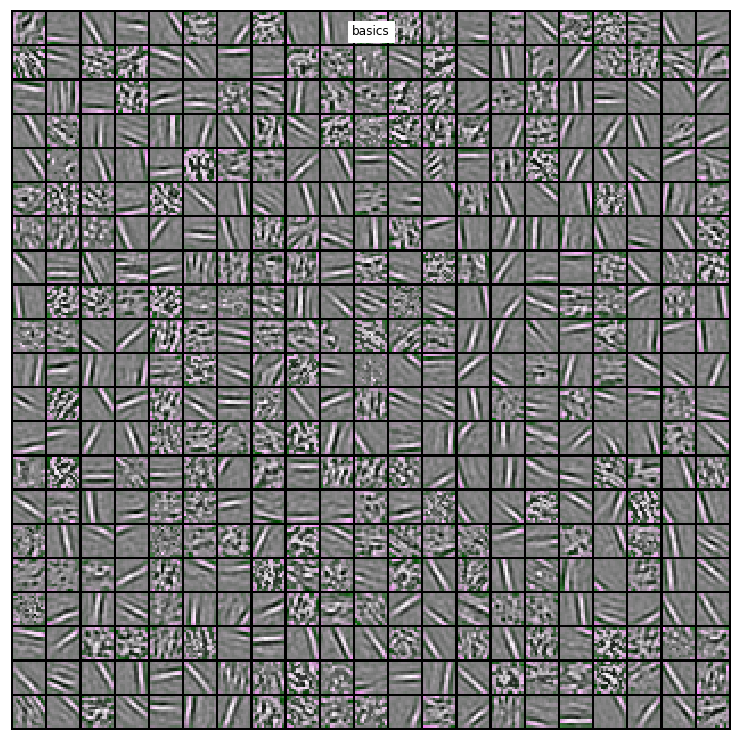

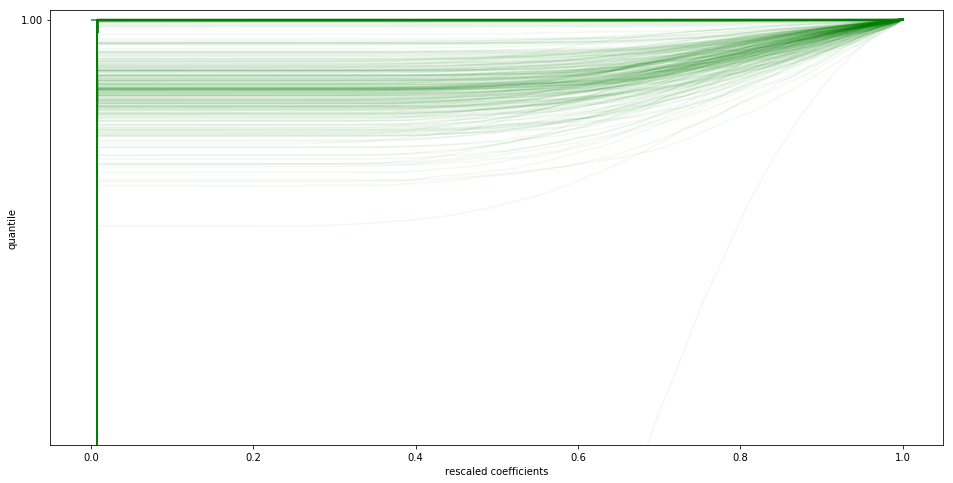

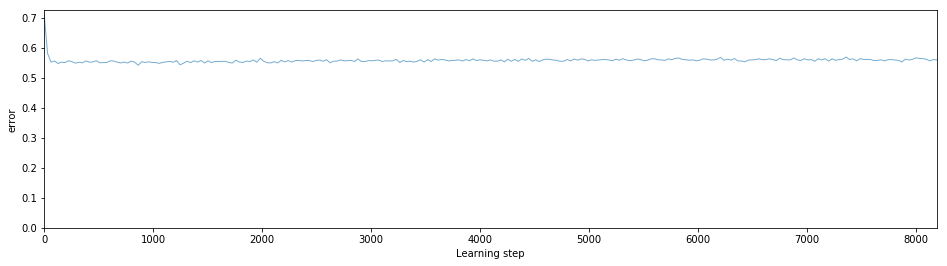

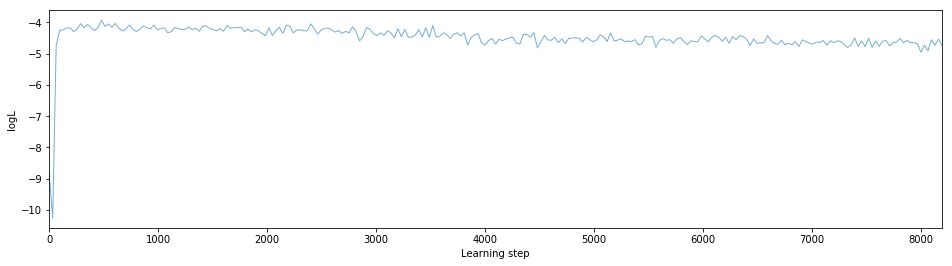

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
help(dico)

Help on SparseHebbianLearning in module shl_scripts.shl_learn object:

class SparseHebbianLearning(builtins.object)
 |  Sparse Hebbian learning
 |  
 |  Finds a dictionary (a set of atoms) that can best be used to represent data
 |  using a sparse code.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_dictionary : int,
 |      Number of dictionary elements to extract
 |  
 |  eta : float or dict
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  n_iter : int,
 |      total number of iterations to perform
 |  
 |  eta_homeo : float
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  alpha_homeo : float
 |      Gives the smoothing exponent  for the homeostatic gain
 |      If equal to 1 the homeostatic learning rule learns a linear relation to
 |      variance.
 |  
 |  dictionary : array of shape (n_dictionary, n_pixels),
 |      initial value of the dictionary for warm restart scenarios
 |      Use ``None`` for a new learning.
 |  
 |  fit_algorith

In [11]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  0.00016302910787136104 +/- 0.0027821404338329025
average energy of filters =  1.0 +/- 7.551026923886592e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [12]:
sparse_code = shl.code(data, dico, matname=matname, l0_sparseness=45)
print('number of codes, size of codewords = ', sparse_code.shape)
print('average of codewords = ', sparse_code.mean())
print('average energy of codewords = ', sparse_code.std(axis=0).mean())
print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

No cache found cache_dir/basics_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp number of codes, size of codewords =  (65520, 441)
average of codewords =  0.04950932831509328
average energy of codewords =  0.196126114237844
std of the average of individual patches =  0.01460969693301529


In [13]:
patches = sparse_code @ dico.dictionary
print('number of codes, size of reconstructed images = ', patches.shape)

number of codes, size of reconstructed images =  (65520, 196)


In [14]:
error = data - patches
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SE = np.sqrt(np.sum(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())

average of residual patches =  -0.0020678951116118566 +/- 0.008536702627739326
average energy of residual =  1.6248038304613885 +/- 0.5330618154128294


## Version used

In [15]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Sat Sep 15 00:08:36 2018 CEST